In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F

In [8]:
from utils import set_all_seeds

transform = transforms.Compose([transforms.Resize((70, 70)),
                                       transforms.RandomCrop((64, 64)),
                                       transforms.ToTensor()])
batch_size = 128
epochs = 20
num_classes=100
lr = 0.0001
RANDOM_SEED = 42

# Load datasets
trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

### Set random seed ###
set_all_seeds(RANDOM_SEED)

##########################
### Dataset
##########################




# train_loader, valid_loader, test_loader = get_dataloaders_cifar10(
#     batch_size=BATCH_SIZE,
#     num_workers=2,
#     train_transforms=train_transforms,
#     test_transforms=test_transforms,
#     validation_fraction=0.1)

Files already downloaded and verified
Files already downloaded and verified


torch.Size([128, 3, 64, 64]) torch.Size([128])


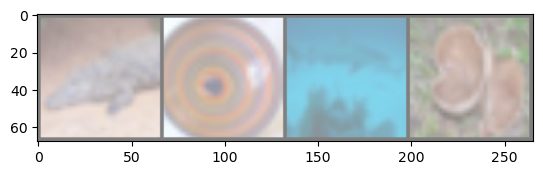

27 10 73 51


In [9]:
import matplotlib.pyplot as plt
from utils import imshow

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)

# show images
imshow(torchvision.utils.make_grid(images[0:4]))
# print labels
print(' '.join(f'{labels[j]:1d}' for j in range(4)))

In [10]:
from models.alexnet import AlexNet

net = AlexNet(num_classes)
loss_fn = F.cross_entropy
# Try to get GPU device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# Assuming that we are on a CUDA machine, this should print a CUDA device:
net.to(device)

optimizer = torch.optim.Adam(net.parameters(), lr=lr)


In [11]:
from train import training_loop

loss, train_acc, val_acc = training_loop(epochs,net,optimizer,device,trainloader,testloader,loss_fn,100
                                         ,'checkpoints/cifar100_alexnet.pth')

***Epoch: 001/020 | Batch:0000/0391 | Loss: 4.605
***Epoch: 001/020 | Batch:0100/0391 | Loss: 4.524
***Epoch: 001/020 | Batch:0200/0391 | Loss: 4.376
***Epoch: 001/020 | Batch:0300/0391 | Loss: 4.083
***Epoch: 001/020 | Train. Acc.: 6.612% | Loss: 3.980
Epoch: 001/020 | Train accuracy: 6.61% | Validation accuracy: 6.80% | Train loss: 3.980| Validation loss: 3.991| Best Validation (Ep. 000): -inf%
Time elapsed: 0.67 min
***Epoch: 002/020 | Batch:0000/0391 | Loss: 4.111
***Epoch: 002/020 | Batch:0100/0391 | Loss: 3.810
***Epoch: 002/020 | Batch:0200/0391 | Loss: 3.700
***Epoch: 002/020 | Batch:0300/0391 | Loss: 3.672
***Epoch: 002/020 | Train. Acc.: 12.634% | Loss: 3.614
Epoch: 002/020 | Train accuracy: 12.63% | Validation accuracy: 12.55% | Train loss: 3.614| Validation loss: 3.640| Best Validation (Ep. 001): 6.80%
Time elapsed: 1.34 min
***Epoch: 003/020 | Batch:0000/0391 | Loss: 3.626
***Epoch: 003/020 | Batch:0100/0391 | Loss: 3.457
***Epoch: 003/020 | Batch:0200/0391 | Loss: 3.513
*

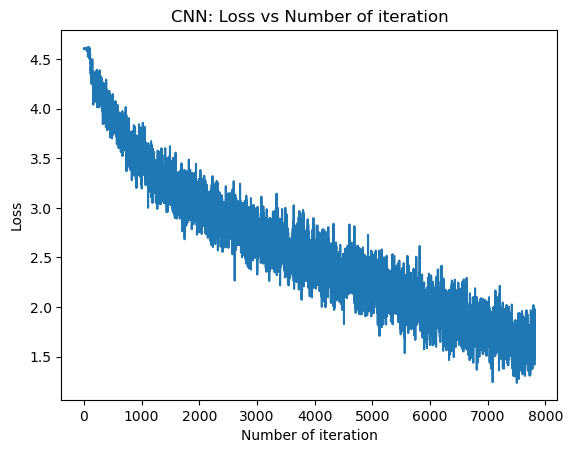

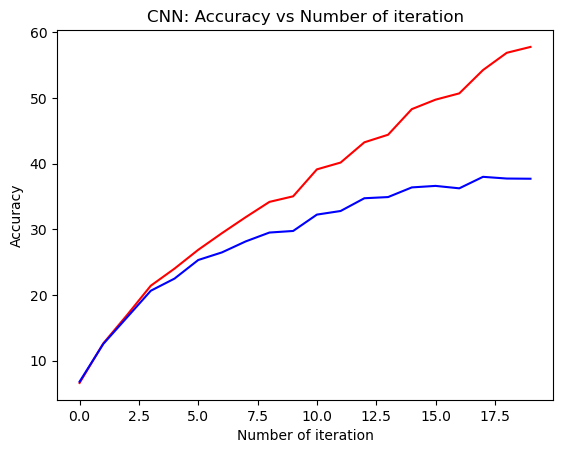

In [12]:
# visualization loss
plt.plot(loss)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy
plt.plot(train_acc,color = "red")
plt.plot(val_acc,color = "blue")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

In [16]:
from train import evaluate

model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
model.to(device)

valid_acc, valid_loss = evaluate(model, testloader, device, loss_fn)

print(valid_acc,valid_loss)

Using cache found in C:\Users\Dario/.cache\torch\hub\pytorch_vision_v0.10.0


cuda:0
0.2199999988079071 14.158005714416504


In [18]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 